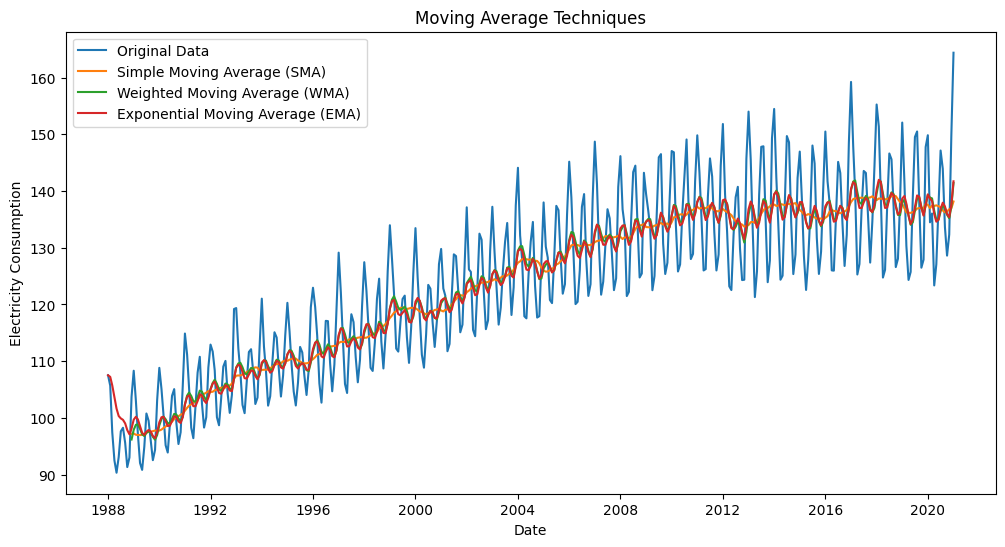

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ML471_S1_Datafile_Concept.csv")

# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Sort by date
df = df.sort_values('DATE')

# Extract consumption
consumption = df['Consumption']

# Window size
window = 12

# Simple Moving Average (SMA)
df['SMA'] = consumption.rolling(window=window).mean()

# Weighted Moving Average (WMA)
weights = np.arange(1, window + 1)

def weighted_moving_average(values):
    return np.dot(values, weights) / weights.sum()

df['WMA'] = consumption.rolling(window).apply(weighted_moving_average, raw=True)

# Exponential Moving Average (EMA)
df['EMA'] = consumption.ewm(span=window, adjust=False).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['DATE'], consumption, label='Original Data')
plt.plot(df['DATE'], df['SMA'], label='Simple Moving Average (SMA)')
plt.plot(df['DATE'], df['WMA'], label='Weighted Moving Average (WMA)')
plt.plot(df['DATE'], df['EMA'], label='Exponential Moving Average (EMA)')

plt.title("Moving Average Techniques")
plt.xlabel("Date")
plt.ylabel("Electricity Consumption")
plt.legend()

plt.show()
